# UCL AI Society Machine Learning Tutorials
### Session 03. Data Pre-processing and Dimensionality Reduction

### Contents
1. Data Pre-processing and Dimensionality Reduction
2. Support Vector Machine (SVM)
3. Clustering: Kmeans

### Aim
At the end of this session, you will be able to:
- Clean your dataset and reduce its redundancy.
- Implement two of the most important ML model: SVM and Kmeans
- Understand the differences between unsupervised and supervised learning.

### Outline
1. Data Preprocessing

    1.1 Missing Value Imputation
    
    1.2 Data Transformation
    
    1.3 Rescaling: Standardization and Normalization


2. Dimensionality Reduction: PCA

## 0. Dataset
First of all, let's introduce a classic dataset from Kaggle competition, where you can check [here](https://www.kaggle.com/c/titanic/overview).

Accordingly, this dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Import baisc libraries
import pandas as pd
import numpy as np

dataPath='./data/titanic.csv'

# TODO: read the dataset using pandas and show the first 10 observations
dataset= pd.read_csv(dataPath)
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Preprocessing
**Data Preprocessing** is one of the most important (sometimes difficult) steps in machine-learning-based engineering. It not only significantly affects the final performance of a given model, but also, to some extent, determines which kind of model better fits the data itself.

In fact, dity aquired data is very common, which means there are always missing values, outliers, badly-behaved distributions, etc. It is **essential** to clean these dity data to train a better-performed model. Additionally, most of machine learning models cannot be fed with some types of data, e.g. non-numerical data, while some of them perfer a certain type of data rather than others, e.g. random forest can be trained faster with histogramized data. Therefore, for the sake of not only adapting model input but also obtaining better performance, we have to preprocess data before we proceed to a further step.

`sklearn` provides many tools which can help us implement data preprocessing easily. In this notebook, we will mainly focus on using this module to implement **missing value imputation**, basic **data transformation**, **standardization** and **normalization**. Techniques used to detect outliers and fix badly-behaved distributions can vary from data to data, so it might not be further discussed this time.

In [2]:
# Drop the useless features for prediction: Name, Ticket, PassagerId
dataset.drop(['Name','Ticket','PassengerId'],axis=1, inplace=True)
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


### 1.1 Missing Value Imputation

The raw data always has a proportion of missing values due to types of error caused by human, sensor, transmission and storage. Missing value imputation aims to undermine the negative impact on the model performance by filling the missing values with meaningful values.

`sklearn.Impute` provides both univariate and multivariate imputation techniques to process missing value. 

`SimpleImputer` class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

`InterativeImputer` class models each feature with missing values as a function of other features, and uses that estimate for imputation.

More info. can be found [here](https://scikit-learn.org/stable/modules/impute.html#impute)

Let's explore which feature has missing value and how many it has.

In [3]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now, the above summary illustrates the wanted information, where there are missing values in `Age`, `Cabin` and `Embarked` features. 

We are going to deal with it with various techniques.

In [4]:
from sklearn import impute

# Firstly, we use 'mean' strategy to impute the missing value in Age feature
imputer_mean = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
# Check the mean of feature Age
age_mean = dataset['Age'].mean()
print("The mean of ages is {:.2f}".format(age_mean))
# SimpleImputer.fit_transform does not accpet pandas Series type, so transform it to numpy array.
age = np.array(dataset['Age']).reshape(-1,1)
dataset['Age'] = imputer_mean.fit_transform(age)

# TODO: check the missing values of the dataset again.
dataset.isnull().sum()

The mean of ages is 29.70


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Since the `Cabin` and `Embarked` features are non-numerical data. Mean and median filling strategies do not work! And thus try to apply most frequent strategy this time.

`mode()` can return the most frequent values.

In [5]:
# Before fill the remaining features, check the most frequent value for each of them
cabin_most=dataset['Cabin'].mode().iloc[0]
embarked_most=dataset['Embarked'].mode().iloc[0]
print("The most frequent value of Cabin is '{}'".format(cabin_most))
print("The most frequent value of Embarked is '{}'".format(embarked_most))

# TODO: follow the above steps to fill the remaining features with most frequent value.
imputer_freq = impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cabin = np.array(dataset['Cabin']).reshape(-1,1)
embarked = np.array(dataset['Embarked']).reshape(-1,1)
dataset['Cabin'] = imputer_freq.fit_transform(cabin)
dataset['Embarked'] = imputer_freq.fit_transform(embarked)

## TODO: check the missing values again, there should be no missing value
dataset.isnull().sum()

The most frequent value of Cabin is 'B96 B98'
The most frequent value of Embarked is 'S'


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

And then let's verify we have fill the wanted values.

In [6]:
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
5,0,3,male,29.699118,0,0,8.4583,B96 B98,Q
6,0,1,male,54.000000,0,0,51.8625,E46,S
7,0,3,male,2.000000,3,1,21.0750,B96 B98,S
8,1,3,female,27.000000,0,2,11.1333,B96 B98,S
9,1,2,female,14.000000,1,0,30.0708,B96 B98,C


Then, we can try a more complex method: `IterativeImputer`

Accordingly, this imputer is still experimental for now, so the `emable_iterative_imputer` module should be imported explicitly.

In [7]:
from sklearn.experimental import enable_iterative_imputer

# Create a brief dataset for convenient verification.
data = np.array([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
print("The given data is:")
print(data)
# Use a regressor to fit the know data pair and predict the missing ones.
imputer_multi = impute.IterativeImputer(max_iter=10, random_state=0)
data = imputer_multi.fit_transform(data)
print("The imputed data is:")
print(data)

The given data is:
[[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [nan  3.]
 [ 7. nan]]
The imputed data is:
[[ 1.          2.        ]
 [ 3.          6.        ]
 [ 4.          8.        ]
 [ 1.50004509  3.        ]
 [ 7.         14.00004135]]


We can see the model learns that the second feature is double the first.

In fact, there more advanced imputation techniques provided by `sklearn.impute`. You may want to check [here](https://scikit-learn.org/stable/modules/impute.html#impute).

### 1.2 Data Transformation

Data transformation is needed, for example, when we want to encode the non-numerical data into numerical representation, transform the continous data into discrete one, etc.

Let's explore how to encode the non-numerical data at first. The titanic dataset has a feature `Sex`, which is a binary variable represented in female and male. It is very hard for computer to deal with this kind of input, and thus encoding is required.

`LabelEncoder()` can recognize the number of classes within one feature, and then encode them as integer number.

In [8]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
sex_label = labelEncoder.fit_transform(dataset['Sex'])
dataset['Sex'] = sex_label
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,B96 B98,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,B96 B98,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,B96 B98,S


However, if we only use `LabelEncoder` to generate a set of integers, it will introduce bias. Just simply think about "Is that fair to encode male as 1 but female as 0? (The bigger number may indicate more importance in the model)".

So, one way to deal with this unfairness is using **One-hot Encoding**, which can be implemented by `OneHotEncoder()`.

In [9]:
from sklearn.preprocessing import OneHotEncoder

# follow the similar process of label encoding, implement One-hot Encoding
OHEncoder = OneHotEncoder()
sex_onehot=OHEncoder.fit_transform(sex_label.reshape(-1,1)).toarray()
# store the one-hot encoding to the dataframe with 2 new columns
dataset['Sex1'] = sex_onehot[:,0]
dataset['Sex2'] = sex_onehot[:,1]
dataset.drop(['Sex'], axis=1, inplace=True)
dataset.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Sex2
0,0,3,22.0,1,0,7.2500,B96 B98,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,B96 B98,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,C123,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,B96 B98,S,0.0,1.0


In some cases, continous data can consume much computation resource. A popular strategy is to transform it into bins like a histogram.

`pandas.cut()` function can help to do so. We test it on the `Age` feature this time, where parameter `x` accepts the input data, `bins` accepts the number of bins that we want to have, `labels` indicates the bin label.

In [10]:
ageBin = pd.cut(x=dataset['Age'], bins=5, labels=range(0,5))
dataset['Age'] = ageBin

In [11]:
dataset.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Sex2
0,0,3,1,1,0,7.2500,B96 B98,S,0.0,1.0
1,1,1,2,1,0,71.2833,C85,C,1.0,0.0
2,1,3,1,0,0,7.9250,B96 B98,S,1.0,0.0
3,1,1,2,1,0,53.1000,C123,S,1.0,0.0
4,0,3,2,0,0,8.0500,B96 B98,S,0.0,1.0
5,0,3,1,0,0,8.4583,B96 B98,Q,0.0,1.0
6,0,1,3,0,0,51.8625,E46,S,0.0,1.0
7,0,3,0,3,1,21.0750,B96 B98,S,0.0,1.0
8,1,3,1,0,2,11.1333,B96 B98,S,1.0,0.0
9,1,2,0,1,0,30.0708,B96 B98,C,1.0,0.0


Now the `Age` feature is cut into 5 bins with thier label. Similarly, we don't want emphasize the importance of the bin with bigger label, so try to use One-hot encoding again.

In [12]:
# TODO: Try to use one-hot encoding like above to encode the Age feature.
OHEncoder = OneHotEncoder()
age_onehot=OHEncoder.fit_transform(np.array(ageBin).reshape(-1,1)).toarray()
dataset['age1'] = age_onehot[:,0]
dataset['age2'] = age_onehot[:,1]
dataset['age3'] = age_onehot[:,2]
dataset['age4'] = age_onehot[:,3]
dataset['age5'] = age_onehot[:,4]
dataset.drop(['Age'], axis=1, inplace=True)

In [13]:
dataset.head(10)

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Sex2,age1,age2,age3,age4,age5
0,0,3,1,0,7.2500,B96 B98,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,0,71.2833,C85,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0,7.9250,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,1,0,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,0,0,8.0500,B96 B98,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0,3,0,0,8.4583,B96 B98,Q,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0,1,0,0,51.8625,E46,S,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,3,3,1,21.0750,B96 B98,S,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1,3,0,2,11.1333,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1,2,1,0,30.0708,B96 B98,C,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### 1.3 Rescaling: Standardization and Normalization

Standardization is used to adjust a feature from non-zero mean and non-norm variance normal distribution to standard normal distribution. Although sometimes we cannot ensure the feature satisfies a normal distribution, standardization is still very important to avoid a feature with big variance significantly leading the model training. In fact, a feature with big variance is likely to prevent the model learns from other features.

The standardization can be expressed as:
$ {X_{std}} = \frac{{X - \bar X}}{\sigma } $, where $\bar X$ and $\sigma$ are the mean value and standard deviation of $ X $.

We use `StandardScaler` in the `sklearn.preprocessing` class to implement data standardization. Let's standardize the fare feature.

In [14]:
from sklearn.preprocessing import StandardScaler

stad = StandardScaler()
dataset['Fare'] = stad.fit_transform(np.array(dataset['Fare']).reshape(-1,1))
dataset.head(10)

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Sex2,age1,age2,age3,age4,age5
0,0,3,1,0,-0.502445,B96 B98,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,0,0.786845,C85,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0,-0.488854,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,1,0,0.420730,C123,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,0,0,-0.486337,B96 B98,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0,3,0,0,-0.478116,B96 B98,Q,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0,1,0,0,0.395814,E46,S,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,3,3,1,-0.224083,B96 B98,S,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1,3,0,2,-0.424256,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1,2,1,0,-0.042956,B96 B98,C,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Normalization is also a good way to avoid model over-emphasizing the feature simply because it has bigger value. For example, if we want to predict person's gender through height and weight, is that fair to directly use the height in meters and weight in kilogram to train our model?

Normalization can rescale the data to the range [0,1], which makes every feature has same importance in training. The normalization can be expressed as: $ {X_{norm}} = \frac{{X - {X_{\min }}}}{{{X_{\max }} - {X_{\min }}}}\ $.

To implement normalization, we are able to apply `MinMaxScaler` in the `sklearn.preprocessing` class. Let's try it!


In [15]:
from sklearn.preprocessing import MinMaxScaler

# TODO: Implement normalization for feature 'Pclass' and show the result
norm = MinMaxScaler()
dataset['Pclass'] = norm.fit_transform(np.array(dataset['Pclass']).reshape(-1,1))
dataset.head(10)

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Sex2,age1,age2,age3,age4,age5
0,0,1.0,1,0,-0.502445,B96 B98,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,1,0,0.786845,C85,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1.0,0,0,-0.488854,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,1,0,0.420730,C123,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1.0,0,0,-0.486337,B96 B98,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0,1.0,0,0,-0.478116,B96 B98,Q,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0,0.0,0,0,0.395814,E46,S,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,1.0,3,1,-0.224083,B96 B98,S,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1,1.0,0,2,-0.424256,B96 B98,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1,0.5,1,0,-0.042956,B96 B98,C,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## 2. Dimensionality Reduction: PCA

In some scenarios, the data dimension (number of features) can be very large (sometimes tens kilo or larger), which leads to a very complex model that tends to overfit. Meanwhile, the data in high dimension always has certain redundancy. So, we might intend to reduce the dimensionality of the features to solve this problem.

**PCA** aims to reduce the data dimension (n) by finding a new set of basis which can represent the data on k(k<n) dimensional space with maximum variance. The figure below demonstrates an example of PCA, which reduce the 3-D data to 2-D. Under the assumption that the bigger data variance indicates more abundant information, PCA is effective and widly applied.

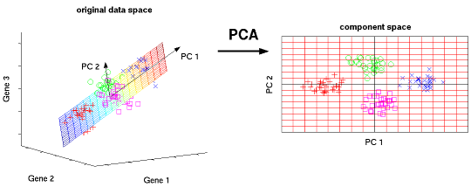

Again we use `Iris` dataset to practice.

In [16]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Get features and label
data = iris.data
feature_name = iris.feature_names
label = iris.target

# Convert to Dataframe to check the data
dataset_df = pd.DataFrame(data, columns=feature_name)
dataset_df['class'] = label
dataset_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Since there are 4 features, it is impossible to show the data points in a 3-D space. Let's just check the first 3 features and show them in a 3-D plot.

Recall the `matplotlib` module we have learnt in the first session, it can be easily implemented using `plot3D` and `scatter3D` function.

In [17]:
# Import matplotlib module
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


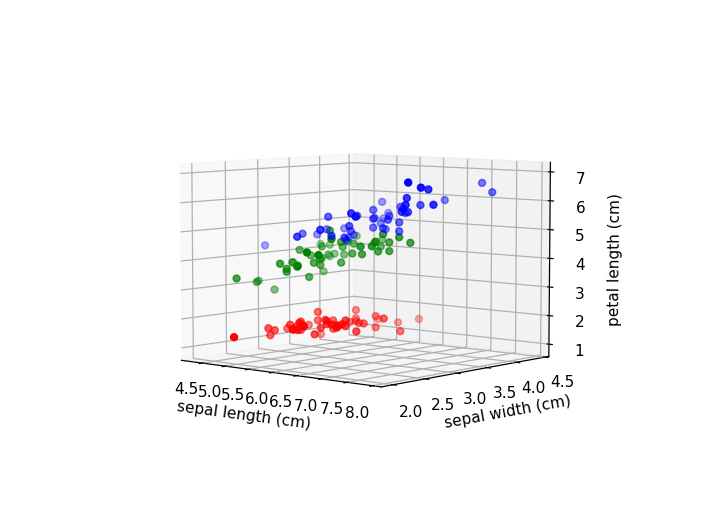

In [18]:
# Split the datasets according to class index
clas=[0,1,2]
for clsNum in clas:
    tempData= dataset_df[dataset_df['class'].isin([clsNum])]
    exec("class%s=tempData"%clsNum)
# Store them into a dictionary
class_dict={'0':class0,'1':class1,'2':class2}

# Add this line to make the graph can be rotated freely
%matplotlib notebook

# Plot the points in 3-D space
plt.figure(0)
ax = plt.axes(projection='3d')

color=['r','g','b']
for i in clas:
    #plot the data points in 3-D space with different color
    ax.scatter3D(class_dict[str(i)][feature_name[0]], 
                 class_dict[str(i)][feature_name[1]], 
                 class_dict[str(i)][feature_name[2]], 
                 c=color[i])
ax.set_xlabel(feature_name[0])
ax.set_ylabel(feature_name[1])
ax.set_zlabel(feature_name[2])

plt.show()

Now, let's apply PCA and see what will happen!

Use `sklearn.decomposition.PCA ` to reduce the 3-D data to 2-D.

In [19]:
from sklearn.decomposition import PCA

pcaModel = PCA(n_components=2)
pcaModel.fit(np.array(dataset_df[feature_name[0:3]]))
data_3D = np.array(dataset_df[feature_name[0:3]])
PCA_feature =pcaModel.transform(data_3D)

# Plot the 2-D plot
plt.figure(1)
for i in range(len(label)):
    plt.scatter(PCA_feature[i,0],PCA_feature[i,1],color=color[dataset_df['class'][i]])
    
plt.show()

<IPython.core.display.Javascript object>

**Tips** Remember when you use PCA in machine learning project, you should use `.fit()` on your training set and `.transform` on your test set. 

Think about why?

Then, let's dig deeper to see the mathmetical implementation of PCA.

Theoretically, PCA transforms the N-feature data to R-feature data (R<N), where the axes in the new space normally have the maximum variance. Assume there are M samples, the algorithm can be concluded as follow:

1. Transform the original data $ \in M*N$ to zero-mean for each feature.

2. Calculate the covariance matrix $C_{N*N}$.

3. Find the eigenvectors $ \in N*1$ and eigenvalues of C.

4. Sort the eigenvalues in a descending order, and compose a new matrix $P \in N*R$ with the first R corresponding eigenvectors.

5. The dimension-reduced data matrix $ \in M*R$ should be $X_{zeroMean} \cdot P$, where $X_{zeroMean}$ is the zero mean data matrix. 

In [20]:
# TODO(Challenge level): 
# Implement the PCA mannully accordingly and verify using the same data as before.
average = np.mean(data_3D,axis=0)
zero_mean = data_3D - average
C = np.cov(zero_mean.T)
eigValue, eigVec=  np.linalg.eig(C)
ind = np.argsort(-eigValue)
selectVec = np.array(eigVec.T[ind[:2]])
pcaData = np.dot(zero_mean , selectVec.T)

**Hint** `np.cov()` can be used to calculate the covariance matrix, `np.linalg.eig()` can return the eigenvalues and eigenvectors, `np.argsort()` can find sorted index of a set of data, `np.transpose()` to get the transpose of a matrix. Bare in mind the **matrix dimensions**, which is very crucial!! 

In [21]:
# TODO: Verify by plot
plt.figure(2)
for i in range(len(label)):
    plt.scatter(pcaData[i,0],pcaData[i,1],color=color[dataset_df['class'][i]])
    
plt.show()

<IPython.core.display.Javascript object>

Note that the axis may have been flipped, but it does not matter!